##V1

In [ ]:
import pandas as pd
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Replace 'path_to_your_dataset.csv' with the actual file path
dataset = pd.read_csv('/content/comments_with_predictions.csv')




In [ ]:
dataset.head()

,Comment,Processed_Comment,Predictions
0,The smoke was just exhaust fumes from when the...,smoke exhaust fumes fot power back try stop pu...,0
1,ขอให้ปลอดภัยกันนะครับ🙏💙⚽🏆🦃,ขอให้ปลอดภัยกันนะครับ🙏💙⚽🏆🦃,0
2,Was a 3rd world ship,world ship,0
3,Was it a accident or preplanned game ?? How c...,accident preplanned game medium one advance re...,0
4,Sad news,sad news,0


In [ ]:
# Drop rows with missing text
dataset.dropna(subset=['Comment'], inplace=True)  # Replace 'text_column' with your actual text column name

In [ ]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply the filter
dataset = dataset[dataset['Comment'].apply(is_english)]


In [ ]:
# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset size

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(dataset['Comment']).toarray()

# Labels
y = dataset['Predictions']  # Replace 'label_column' with your actual label column name


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9404682274247491

Confusion Matrix:
 [[1402    0]
 [  89    4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1402
           1       1.00      0.04      0.08        93

    accuracy                           0.94      1495
   macro avg       0.97      0.52      0.53      1495
weighted avg       0.94      0.94      0.91      1495



In [ ]:
!pip install scikit-plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


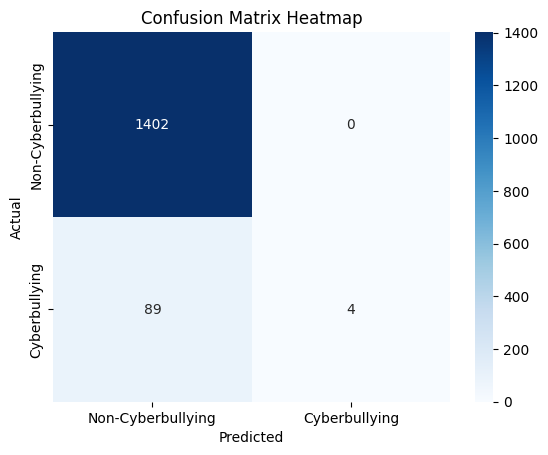

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()


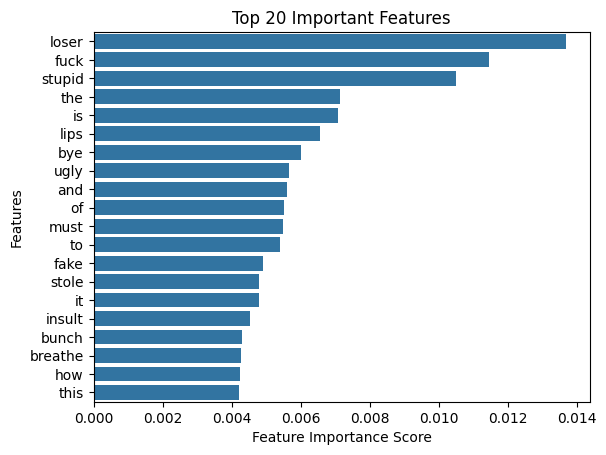

In [ ]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=tfidf_vectorizer.get_feature_names_out()).sort_values(ascending=False)[:20]
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Important Features')
plt.show()


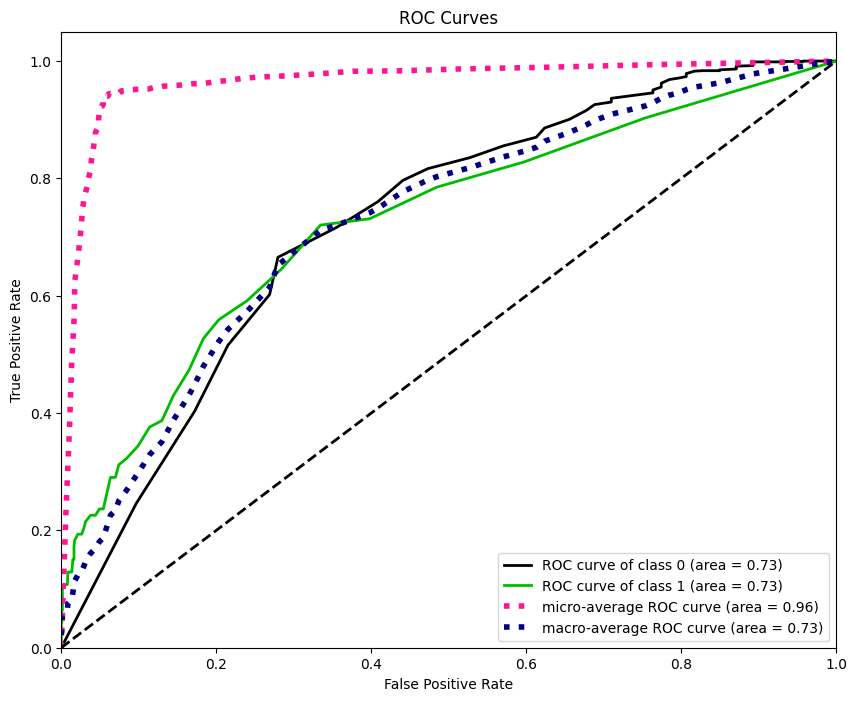

In [ ]:
y_probas = rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))
plt.title('ROC Curves')
plt.show()


## Updated

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [ ]:
# Replace 'path_to_your_dataset.csv' and 'text_column'/'label_column' with your actual file path and column names
dataset = pd.read_csv('/content/comments_with_predictions.csv')
X = dataset['Comment']
y = dataset['Predictions']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the TfidfVectorizer and SMOTE
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
smote = SMOTE(random_state=42)

# Initialize the Random Forest Classifier with class_weight='balanced'
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('smote', smote),
    ('rf', rf_classifier)
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('smote', SMOTE(random_state=42)),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [ ]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9392712550607287

Confusion Matrix:
 [[1615   12]
 [  93    9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1627
           1       0.43      0.09      0.15       102

    accuracy                           0.94      1729
   macro avg       0.69      0.54      0.56      1729
weighted avg       0.92      0.94      0.92      1729



##V3 Balancing  Dataset

In [ ]:
import pandas as pd

# Load your dataset
dataset = pd.read_csv('/content/comments_with_predictions.csv')

# Separate the dataset into the majority and minority classes
df_majority = dataset[dataset.Predictions == 0]
df_minority = dataset[dataset.Predictions == 1]


In [ ]:
# Oversample minority class
df_minority_oversampled = df_minority.sample(len(df_majority), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset to avoid any ordering bias
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# Oversample minority class
df_minority_oversampled = df_minority.sample(len(df_majority), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset to avoid any ordering bias
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# Save the new balanced dataset
df_balanced.to_csv('balanced_dataset.csv', index=False)


,Comment,Processed_Comment,Predictions
0,What did the swat team think that was going to...,swat team think go opposition arrive hair comb...,0
1,The Irony of all the AI comments,irony ai comment,0
2,"God bless Russia, Glory to Russia in jesus mig...",god bless russia glory russia jesus mighty nam...,0
3,Yes turning some lights off around the world s...,yes turn light around world solves climate cha...,0
4,Why are Federal dollars being used to prop up ...,federal dollar use prop city push away white w...,0


##Final Version


In [ ]:
import pandas as pd
from langdetect import detect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample


In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/balanced_dataset.csv')

# Function to detect English text
def is_english(text):
    try:
        return detect(text) == 'en'
    except Exception as e:  # This will catch errors like detecting language of empty strings or strings with no linguistic content
        return False

# Remove non-English rows
dataset['is_english'] = dataset['Comment'].apply(is_english)
dataset = dataset[dataset['is_english']]

# Clean text data
dataset.loc[:, 'Comment'] = dataset['Comment'].str.replace(r"[^a-zA-Z\s]", '', regex=True)
dataset.loc[:, 'Comment'] = dataset['Comment'].str.lower()

# Shuffle the dataset
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Split dataset into features and target variable
X = dataset['Comment']
y = dataset['Predictions']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Only transform the test data
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.994486560992419

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1393
           1       0.99      1.00      0.99      1509

    accuracy                           0.99      2902
   macro avg       0.99      0.99      0.99      2902
weighted avg       0.99      0.99      0.99      2902



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np


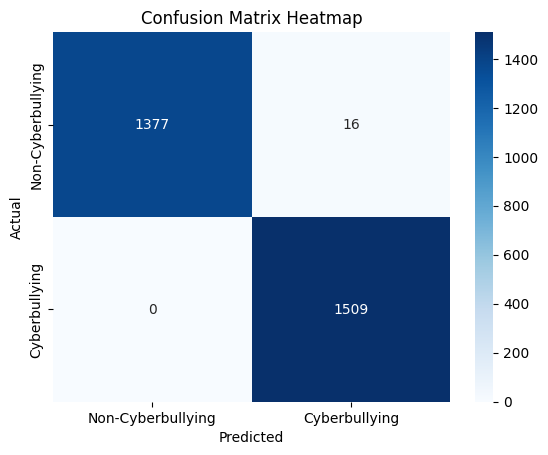

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cyberbullying', 'Cyberbullying'], yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()


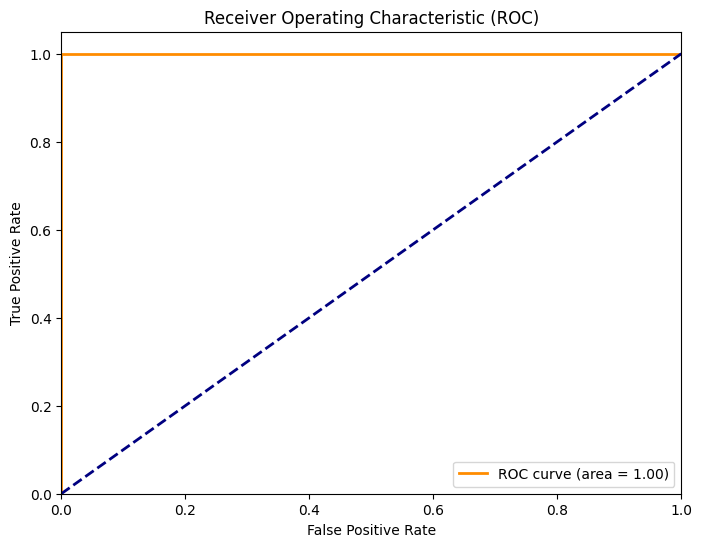

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_tfidf)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


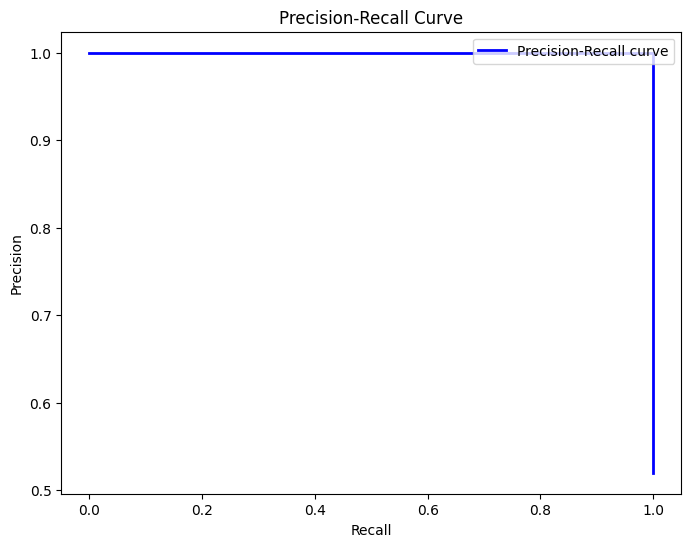

In [ ]:
# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, rf_classifier.predict_proba(X_test_tfidf)[:,1])

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(rf_classifier, 'rf_classifier.joblib')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


In [ ]:
import re

In [ ]:
def load_models():
    # Load the model and vectorizer
    model = joblib.load('rf_classifier.joblib')
    vectorizer = joblib.load('tfidf_vectorizer.joblib')
    return model, vectorizer

def predict_comment(comment, model, vectorizer):
    # Preprocess the comment
    comment = comment.lower()
    comment = re.sub(r"[^a-zA-Z\s]", '', comment)

    # Vectorize the comment
    comment_vectorized = vectorizer.transform([comment])

    # Make a prediction
    prediction = model.predict(comment_vectorized)

    # Return the predicted class
    return 'Cyberbullying' if prediction[0] == 1 else 'Non-Cyberbullying'

if __name__ == "__main__":
    # Load the trained model and vectorizer
    model, vectorizer = load_models()

    # Input from user
    input_comment = input("Enter a comment to classify: ")

    # Get the prediction
    result = predict_comment(input_comment, model, vectorizer)

    # Print the result
    print(f"The comment is classified as: {result}")


In [ ]:
def load_models():
    # Load the model and vectorizer
    model = joblib.load('rf_classifier.joblib')
    vectorizer = joblib.load('tfidf_vectorizer.joblib')
    return model, vectorizer

def predict_comment(comment, model, vectorizer):
    # Preprocess the comment
    comment = comment.lower()
    comment = re.sub(r"[^a-zA-Z\s]", '', comment)

    # Vectorize the comment
    comment_vectorized = vectorizer.transform([comment])

    # Make a prediction
    prediction = model.predict(comment_vectorized)

    # Return the predicted class
    return 'Cyberbullying' if prediction[0] == 1 else 'Non-Cyberbullying'

if __name__ == "__main__":
    # Load the trained model and vectorizer
    model, vectorizer = load_models()

    # Input from user
    input_comment = input("Enter a comment to classify: ")

    # Get the prediction
    result = predict_comment(input_comment, model, vectorizer)

    # Print the result
    print(f"The comment is classified as: {result}")
